# Task 1 - The Sparks Foundation
# Ambuj Garg

# Percentage Prediction Problem - Regression - Supervised ML
* Predict the Percentage of a student based on the number of study hours. Simple Linear Regression Problem with just two variables. What will be predicted score if a student studies for 9.25 Hours/per day.

**Importing Liberaries**

In [1]:
##Importing the required liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Reading the Data from URL**

In [2]:
#Reading the data from the csv file URL.

df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

#There are two variables, the predictor variable is Hours, and the target variable is Scores.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Basic Data Understanding**

In [3]:
df.shape

#There are 25 records.

(25, 2)

In [4]:
df.info()

#Both the variables are numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

#There are no null values.

Hours     0
Scores    0
dtype: int64

In [6]:
#The statistical summary of the data

df.describe()

#The mean hours of study are 5 Hours with standard deviation of 2.5 hours.
# The minimum hours are 1 hour, whereas the maximum hours are 9.2 hours.

#The mean scores of students are 51.48% with standard deviation of 25.28%.
#The minimum scores are 17% whereas the maximum scores are 95%.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

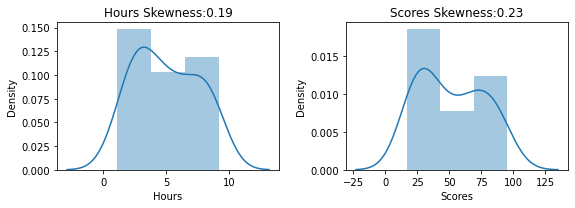

In [7]:
#Distribution for both the variables
plt.figure(figsize=(8,3))
t=1
for i in df.columns:
    plt.subplot(1,2,t)
    sns.distplot(df[i])
    plt.title('%s Skewness:%.2f'%(i,df[i].skew()))
    t+=1
plt.tight_layout()
plt.show()

#The variables are normally distributed. 
#The maximum students study for around 3 hours. 
#The maximum students scored around 30 percent.

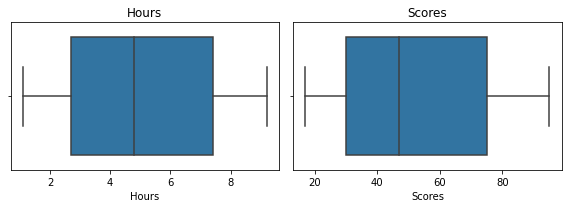

In [8]:
#Distribution for both the variables
plt.figure(figsize=(8,3))
t=1
for i in df.columns:
    plt.subplot(1,2,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

#The variables are normally distributed. The median score are lower then mean scores.
#there is no presence of outliers.

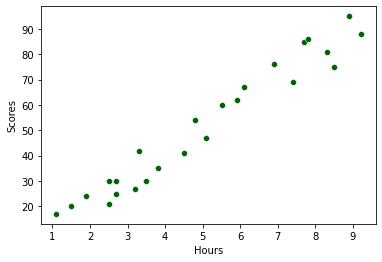

In [9]:
#Visualization of variation in Scores with varying number of study hours.

sns.scatterplot(df['Hours'],df['Scores'],color='darkgreen')
plt.show()

#The scores and hours seems to have a linear relation.

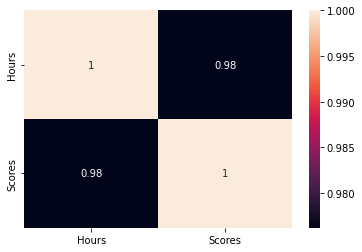

In [10]:
#Measuring the strength of relation between the two variables.

sns.heatmap(df.corr(),annot=True)
plt.show()

#The hours seems to be highly correlated to the scores,
#that is the number of study hours highly impact the scores in a positive direction 
#that is whenever the number of study hours increase the scores increase as well.

In [11]:
#Not applying train test split as:
# The test value given is 9.25 hours.

#separating the predictor and target variable.
x=df['Hours']
y=df['Scores']

**Base Model OLS with assumptions for Linear Regression**

In [12]:
#Assumptions to check before applying Linear regression model

#1. The target variable is numerical.
#2. There is no multicollinearity present as there is only one predictor variable.

In [13]:
#Base Model
basemodel=ols('Scores~Hours',df).fit()
basemodel.summary()

#The R-squared and Adj R-squared have values of 0.953 and 0.951, 
#therefore the model is significant and the predictor is good as well.
#The pvalue of f-stats indicate that the model is significant.
#The pvalue for the predictor is 0, which indicates that the predictor is significant.
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           9.13e-17
Time:                        15:24:53   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Assumptions to be checked after the application of linear regression model::

#1. Linearity Test::
import statsmodels.api as sma

#Ho:: The predictor andd target variables have linear relationship
#Ha:: The predictor and target variables are not linearly related

print('Pvalue: ',sma.stats.linear_rainbow(basemodel)[1])

#The pvalue is greater then 0.05. Therefore we fail to reject the null hypothesis.
#The linearity test is passed. The predictor and the target variables are linearly related.

Pvalue:  0.11910586650135202


In [15]:
#2. Autocorrelation of Errors

from statsmodels.stats.stattools import durbin_watson

print(durbin_watson(basemodel.resid))

#the value of durbin watson is silghlty less then 1.5. 
#There might be slight positive correlation among the errors.
#Usually, it's due to missing key variable that autocorrelation occurs.
#But we have just one variable. Therefore we will go ahead with this model.

1.4601573762506732


In [16]:
#3. Homoscedasticity of error terms

from statsmodels.stats.diagnostic import het_breuschpagan

print(het_breuschpagan(basemodel.resid,df)[-1])

#The pvalue is less than 0.05. Therefore the errors are heteroscedastic.
#The data has heteroscedaticity in error.

2.9161186037127572e-06


**Linear Model with Train Test Split**

In [17]:
#Testing the model using train test split

xtr,xtest,ytr,ytest=train_test_split(x,y,test_size=0.3,random_state=90)

lr=LinearRegression()
model=lr.fit(pd.DataFrame(xtr),ytr)
trpred=model.predict(pd.DataFrame(xtr))
tpred=model.predict(pd.DataFrame(xtest))
r2train=r2_score(ytr,trpred)
r2test=r2_score(ytest,tpred)
print('train R2: ',r2train)
print('test R2: ',r2test)
rmsetrain=np.sqrt(mean_squared_error(ytr,trpred))
rmsetest=np.sqrt(mean_squared_error(ytest,tpred))
print('Train rmse: ',rmsetrain)
print('Test rmse: ',rmsetest)


    
#The R2 score of both the train and test is above 0.90. Therefore the model is good. 
#We have rmse value of 4.24% that is we can predict the scores with deviation of
#just 4.24%.

train R2:  0.9412182244264513
test R2:  0.9712777006575188
Train rmse:  5.847799208547898
Test rmse:  4.249605359511046


**Final Model on whole data to predict on given Test Data**

In [18]:
#Applying The sklearn Linear regression Model on whole data and 
#predicting the scores for the test value

xtest=pd.DataFrame(pd.Series(9.25))
lr=LinearRegression()
lrmodel=lr.fit(pd.DataFrame(x),y)
trainpred=lrmodel.predict(pd.DataFrame(x))
print('R2 Score for train: ',r2_score(y,trainpred))
lrmodel.predict(xtest)

R2 Score for train:  0.9529481969048356


array([92.90985477])

**Therefore the model predicted that the student studying 9.25 hours/per day would score around 92.90%**

**-------------------------------------------------------------------Thankyou-----------------------------------------------------------------------------**